In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category= DeprecationWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier




In [29]:
def read_data(train_data, test_data):

  train_data = pd.read_csv(train_data)
  test_data = pd.read_csv(test_data)

  combine_df = train_data.append(test_data, ignore_index = True, sort = False)

  return train_data,test_data,combine_df

In [30]:
train_data,test_data,combine_df = read_data('train.csv','test.csv')

In [31]:
train_data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [32]:
# train_data.info()
train_data.isnull().sum()
# for col in train_data.columns:
#   print(train_data[col].value_counts())

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

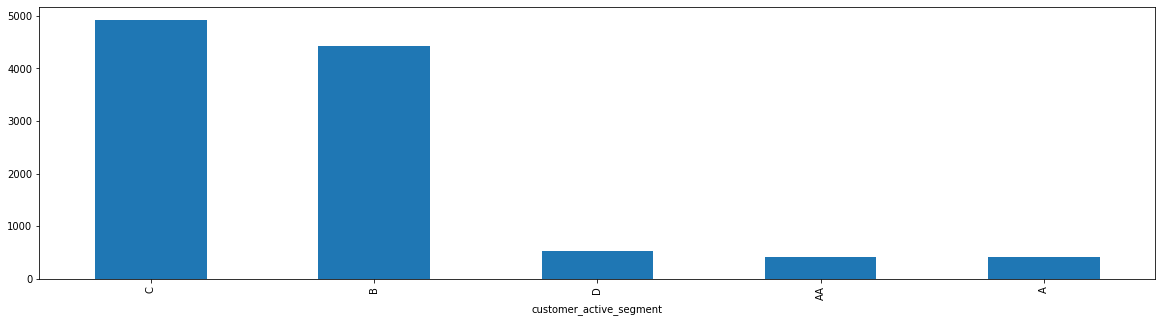

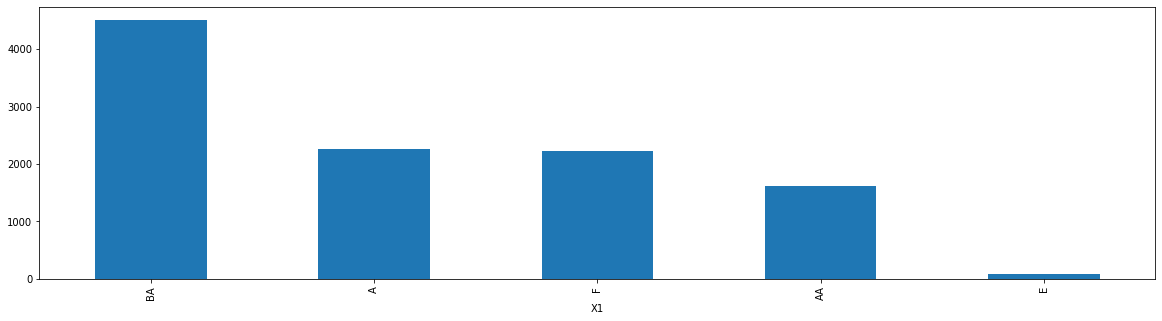

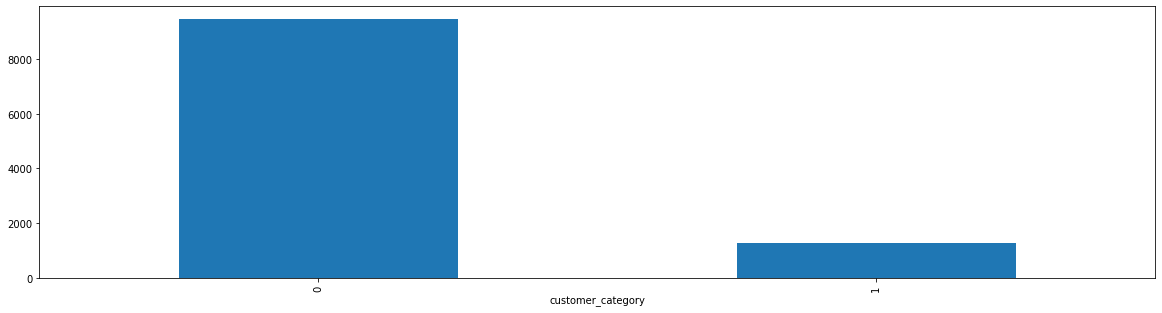

In [33]:
# train_data.pet_category.value_counts().plot(by='breed_category' ,kind='bar')
# train_data.breed_category.value_counts().plot(kind='bar')
cols = train_data.columns

# cols
for col in cols[9:]:
  plt.figure(figsize=(20,5))
  train_data[col].value_counts().plot(kind='bar')
  plt.xlabel(col)
  plt.show()


# train_data.hist(column='pet_category',by='breed_category')


In [34]:
# test_data.info()
test_data.isnull().sum()


customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

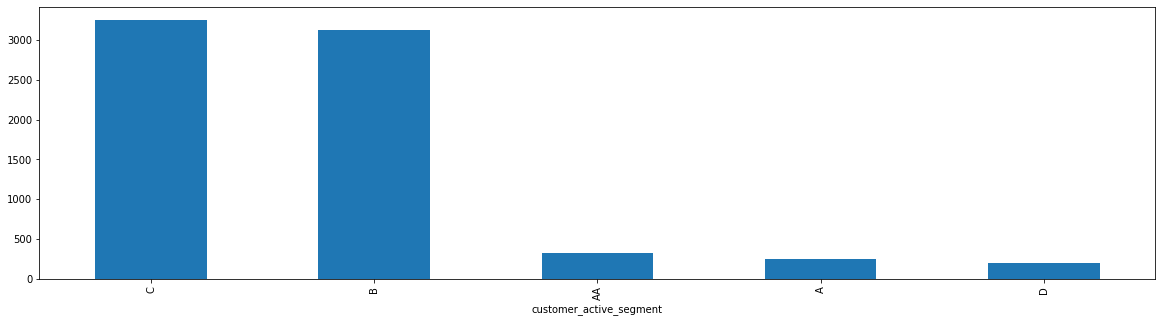

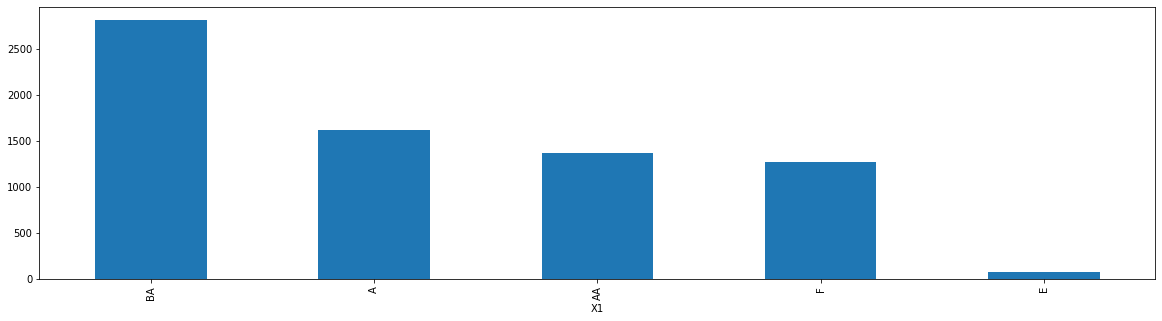

In [35]:
cols = test_data.columns

# cols
for col in cols[9:]:
  plt.figure(figsize=(20,5))
  test_data[col].value_counts().plot(kind='bar')
  plt.xlabel(col)
  plt.show()

In [36]:
train_data.select_dtypes('number').columns

Index(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_category'],
      dtype='object')

In [37]:
train_data.select_dtypes('object').columns

Index(['customer_id', 'customer_active_segment', 'X1'], dtype='object')

In [38]:
train_data.shape

# train_data.isnull().sum()

(10738, 12)

In [39]:
from sklearn.preprocessing import LabelEncoder
def preprocessing(df,df_test):

  le = LabelEncoder()

#   df.customer_product_search_score.fillna(df.customer_product_search_score.median(),inplace = True)
#   df.customer_stay_score.fillna(df.customer_stay_score.median(),inplace = True)
#   df.customer_product_variation_score.fillna(df.customer_product_variation_score.median(),inplace = True)
#   df.customer_order_score.fillna(df.customer_order_score.median(),inplace = True)
#   df.customer_active_segment.fillna('C',inplace = True)
#   df.X1.fillna('BA',inplace = True)
  df.dropna(how='any',inplace=True)


  df_test.customer_product_search_score.fillna(df_test.customer_product_search_score.median(),inplace = True)
  df_test.customer_stay_score.fillna(df_test.customer_stay_score.median(),inplace = True)
  df_test.customer_product_variation_score.fillna(df_test.customer_product_variation_score.median(),inplace = True)
  df_test.customer_order_score.fillna(df_test.customer_order_score.median(),inplace = True)
  df_test.customer_active_segment.fillna('C',inplace = True)
  df_test.X1.fillna('BA',inplace = True)


  active_seg=pd.get_dummies(df[['customer_active_segment']])
  df = pd.concat([df,active_seg],axis=1)


  x1=pd.get_dummies(df[['X1']])
  df = pd.concat([df,x1],axis=1)



  test_active_seg=pd.get_dummies(df_test[['customer_active_segment']])
  df_test = pd.concat([df_test,test_active_seg],axis=1)


  test_x1=pd.get_dummies(df_test[['X1']])
  df_test = pd.concat([df_test,test_x1],axis=1)

  print("Nulls in each column:", df.isnull().sum())

  df = df.drop(columns = ['customer_active_segment','X1'],inplace = False)
  df_test = df_test.drop(columns = ['customer_active_segment','X1'],inplace = False)


  return df,df_test


In [40]:
train_data,test_data = preprocessing(train_data,test_data)
# test_data = test_preprocessing(test_data)

Nulls in each column: customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
customer_active_segment_A           0
customer_active_segment_AA          0
customer_active_segment_B           0
customer_active_segment_C           0
customer_active_segment_D           0
X1_A                                0
X1_AA                               0
X1_BA                               0
X1_E                                0
X1_F                                0
dtype: int64


In [41]:
train_data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0,0,0,0,1,0,0,0,0,0,1
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0,0,0,0,1,0,1,0,0,0,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0,0,0,0,1,0,0,0,1,0,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0,0,1,0,0,0,0,0,0,0,1
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0,0,0,0,1,0,0,1,0,0,0


In [42]:
test_data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,0,0,1,0,0,0,0,1,0,0
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,0,0,1,0,0,0,1,0,0,0
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,0,0,1,0,0,0,1,0,0,0
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,0,0,1,0,0,0,0,1,0,0
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,0,0,0,1,0,0,0,1,0,0


In [43]:
from sklearn.tree import DecisionTreeClassifier
# y = train_data[['breed_category','pet_category']]
y = train_data[['customer_category']]

x = train_data.drop(columns=['customer_category'],inplace=True)


In [44]:
x = train_data.drop(columns=['customer_id'])

In [45]:
x.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment_A,customer_active_segment_AA,customer_active_segment_B,customer_active_segment_C,customer_active_segment_D,X1_A,X1_AA,X1_BA,X1_E,X1_F
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0,0,0,1,0,0,0,0,0,1
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0,0,0,1,0,1,0,0,0,0
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0,0,0,1,0,0,0,1,0,0
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0,1,0,0,0,0,0,0,0,1
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0,0,0,1,0,0,1,0,0,0


In [46]:
# x.color_type.value_counts()

In [47]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size = 0.2)

In [49]:
# len(x.columns
# test_data.columns

In [50]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm
breed_model =  RandomForestClassifier()

# breed_model =  xgb.XGBClassifier()
# breed_model =  GradientBoostingClassifier()
# breed_model = lightgbm.LGBMClassifier()

breed_model.fit(X_train,y_train)
# print(breed_model.feature_importances_)

print(classification_report(y_val, breed_model.predict(X_val)))

preds_breed = breed_model.predict(test_data.drop(columns=['customer_id']))


C:\Users\rohit.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rohit.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1854
           1       0.94      0.82      0.88       245

    accuracy                           0.97      2099
   macro avg       0.96      0.91      0.93      2099
weighted avg       0.97      0.97      0.97      2099



In [51]:
cnt =1

In [53]:
submission =  pd.DataFrame({'customer_id':test_data['customer_id'],'customer_category':preds_breed})
submission.to_csv('sub'+str(cnt)+'.csv',index=0)
cnt+=1